## PEC00025 - Introdução a Teoria de Vibrações

## Trabalho 01

**Aluno**: Gabriel Orso Garcia

**Data:** 30/03/2022

**Descrição do Teste:** Para obter os dados de aceleração em vibração livre, um smartphone foi amarrado nas cordas (de nylon) de um pequeno varal interno. Após isso, uma força foi aplicada verticalmente, empurrando o aparelho para baixo e esticando as cordas, e então o sistema foi liberado para vibração livre. A imagem abaixo apresenta um varal semelhante ao que foi utilizado para o teste:

![experimento](img.webp "T1")

In [1]:
# Importação básica das bibliotecas:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from MRPy import MRPy

%matplotlib inline

Abaixo podemos ver os gráficos de Aceleração x Tempo medidas nas três direções pelo aplicativo INVH do smartphone.

 fs = 405.3Hz
 Td = 13.7s

 NX = 3
 N  = 5544
 M  = 2773



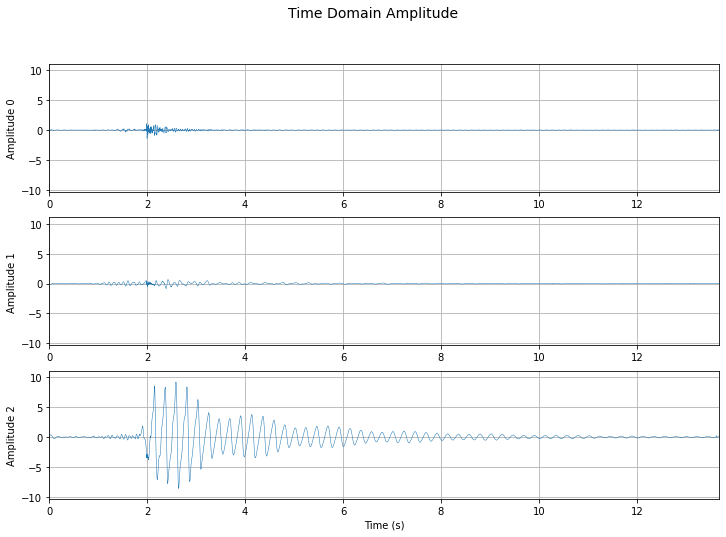

In [2]:
data_original = MRPy.from_file('T1_00275506_dados', form='invh')
data_original.printAttrib()
data_original.plot_time(fig=1);

### Vibração encontrada:

Apesar dos dados coletados apresentarem uma vibração aparentemente senoidal, é importante notar que parece acontecer junto um outro efeito, talvez fruto de outra vibração que acontecia junto no sistema. Ele se torna perceptível ao percebermos que as amplitudes máximas da onde aumentam e diminuem com o tempo, conforme explicitado na imagem abaixo:


![experimento](img2.bmp "T1")



### Extração dos Dados:

Para extrair os dados, decidi analisar diversos recortes temporais dos dados coletados (através do ajuste de mínimos quadráticos) para ter melhor idéia da importância da faixa a ser extraída da gravação original. As variações foram escolhidas como:

**Tempo inicial:**
    
    - 2,5 / 3 / 3,5 / 4 / 4,5 segundos
    
**Tempo Final:**

    - 6 / 8 / 10 / 12 / 13.5 segundos
    
para isso, o pequeno algoritmo abaixo foi desenvolvido:

In [3]:
initial_t = [2.5,3,3.5,4,4.5]
final_t = [6,8,10,12,13.5]

tabela1 = []

for i in range(4):
    tabela1.append( [0]*25 )

i = 0

for t1 in initial_t:
    for t2 in final_t:
        free = data_original.extract((t1, t2), by='time')
        afit, par = free.fit_decay()
        tabela1[0][i] = round(t1 ,3)
        tabela1[1][i] = round(t2 ,3)
        tabela1[2][i] = round(par[2,1],3)
        tabela1[3][i] = round(par[2,2]*100,3)
        i += 1
        
tabela = pd.DataFrame(tabela1)
tabela = tabela.transpose()
tabela.rename( columns={0:'t1',1:'t2',2:'Frequency',3:'Damping'} ,inplace = True )
display(tabela)

,t1,t2,Frequency,Damping
0,2.5,6.0,4.492,1.835
1,2.5,8.0,4.489,1.695
2,2.5,10.0,4.489,1.655
3,2.5,12.0,4.490,1.641
4,2.5,13.5,4.490,1.638
5,3.0,6.0,4.490,1.336
6,3.0,8.0,4.486,1.350
7,3.0,10.0,4.488,1.356
8,3.0,12.0,4.489,1.355
9,3.0,13.5,4.489,1.355


Analisando a tabela acima podemos perceber que a frequência fica próxima de 4,5 Hz para qualquer recorte de tempo, e portanto este não fará muita diferença no resultado final da frequência. 

Já o fator de amortecimento varia bastante conforme o recorte de tempo escolhido, mas tende a ser muito próximo nos 4 últimos intervalos do tempo final (t2) para os diferentes valores de tempo inicial (t1).

A fim de tentar representar melhor a vibração como um todo, escolhi o maior intervalo de tempo possível:

 - Tempo inicial = 2.5 segundos
 - Tempo final = 13.5 segundos

 fs = 405.3Hz
 Td = 9.5s

 NX = 3
 N  = 3850
 M  = 1926



[[<matplotlib.lines.Line2D at 0x286514fd520>],

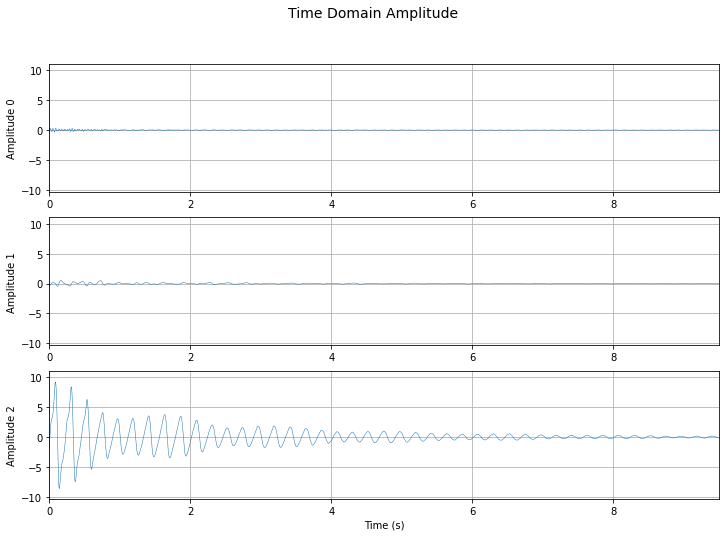

In [4]:
%matplotlib inline
#qt5 para imprimir em janela
#inline para imprimir na célula

free = data_original.extract((2.5, 12), by='time')

free.printAttrib()
free.plot_time(fig=2)

PARÂMETROS DA VIBRAÇÃO:

MÉTODO DECREMENTO LOGARÍTMICO:  
Amplitude:              9.25m/s2
Frequência:             4.50Hz  
Razão de Amortecimento: 1.67%   
Fase:                   2.50rad 

MÉTODO FIT_DECAY:               
Amplitude:              6.26m/s2
Frequência:             4.49Hz  
Razão de Amortecimento: 1.64%   
Fase:                   1.79rad 


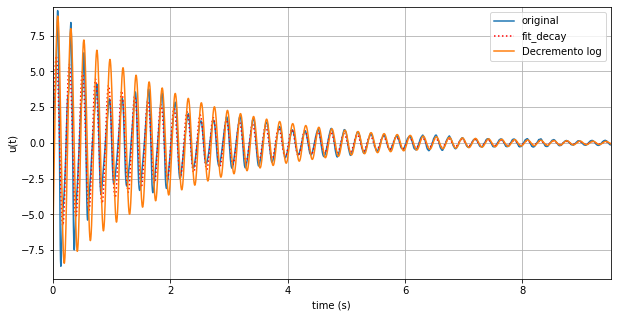

In [5]:
print("PARÂMETROS DA VIBRAÇÃO:")
print()

#DECREMENTO LOGARÍTIMICO:

# o primeiro ponto possui a = 9.25 m/s²  N = 1
# o segundo  ponto possui a = 0.36 m/s²  N = 32
zt = np.log(9.25/0.36)/(2*np.pi*31)

fn = 9/2 # de t = 2 a t = 4 podemos contar 9 ciclos
wn = 2*np.pi*fn
umax = 9.25 #valor no primeiro ciclo

Td = 9.5
fs = 300

t_log = np.linspace(0, Td, int(fs*Td))
wD = wn*np.sqrt(1 - zt**2)
e  = np.exp(-zt*wn*t_log)
phi = 2.5
#a fase foi ajustada "no olho" para o primeiro topo
uD = e*(umax*np.cos(wD*t_log-phi))

print("MÉTODO DECREMENTO LOGARÍTMICO:  ")
print('Amplitude:              {0:4.2f}m/s2'.format(umax))
print('Frequência:             {0:4.2f}Hz  '.format(fn))
print('Razão de Amortecimento: {0:4.2f}%   '.format(zt*100))
print('Fase:                   {0:4.2f}rad '.format(phi))
print('')

#FIT_DECAY:

afit, par = free.fit_decay()
t         = free.t_axis()

plt.figure(4, figsize=(10, 5), clear=True)
plt.plot(t, free[2])
plt.plot(t, afit[2], 'r:')
plt.plot(t_log,uD)
plt.legend(('original','fit_decay','Decremento log'))

plt.xlim( 0, 9.5);  plt.xlabel('time (s)') 
plt.ylim(-9.5, 9.5);  plt.ylabel('u(t)') 

plt.grid(True) 

print("MÉTODO FIT_DECAY:               ")
print('Amplitude:              {0:4.2f}m/s2'.format(par[2,0]))
print('Frequência:             {0:4.2f}Hz  '.format(par[2,1]))
print('Razão de Amortecimento: {0:4.2f}%   '.format(par[2,2]*100))
print('Fase:                   {0:4.2f}rad '.format(par[2,3]))

### Comentários:

Podemos perceber que a razão de amortecimento ficou bem próxima pelos dois métodos, já fase e a amplitude da vibração ficaram com valores significativamente diferentes, o que explica a diferença das curvas no gráfico plotado. Como a aceleração inicial do sistema foi escolhida para coincidir com a primeira vibração, o método do decremento logarítmico acabou ficando mais destoante nos ciclos seguintes do sistema.